# Self practice

You have now learnt how to use python functions, handle external data and create plots.
Complete the below tasks to test your knowledge.

1. Find a built-in function we have not used and show an example usage. **[Hint: Search on the internet]**
2. Go to the Python package index at **https://pypi.org**, identify any package you like, install it and show an example usage. **[Hint: See slide on installing packages and importing them]**

   Using the TCGA_converted.csv data you saved earlier:
3. Create a new data frame containing only samples S6, S9 and gene columns. **[Hint: See Extracting Rows and Columns]**
4. Using the data in 3. above, add a new column showing the ratio of gene expression in S6 and S9. **[Hint: See section Add new column]**
5. Extract a list of genes with ratio greater than 100.
6. Create a new dataframe from 3. above, which has only rows with expression greater than 100 in S6 and expression less than 50 in S9. **[Hint: See subsetting data frame]**
7. Create a scatter plot for the expression in S1 against S18 (apply log10 transformation to the plot). **[Hint: See scatter plot section and search the internet]**
8. Create any new type of plot not covered in the above practical using the data from 3. above. You are allowed to transform this data in anyway you want. **[Hint: See the matplotlib documentation page at https://matplotlib.org/stable/plot_types/index.html]**.

# Remember to use markdown to comment on what you are doing.

# 1

In [1]:
# I found a function called abs() at https://docs.python.org/3/library/functions.html
# It gets the absolute number of a value
abs(-12)

12

# 2

In [3]:
# I found a package for working with images called Pillow at https://pypi.org/project/Pillow/
# I will use it to dsiplay an image
from PIL import Image
im = Image.open("mans.jpg")
im.show()
# You can use any image for your test.


# 3

In [18]:
# First get the pandas package if you dont have it already
import pandas as pd
exp3 = pd.read_csv("TCGA_converted")
# Get the subset
newexp = exp3.loc[:, ["S6", "S9", "gene"]]
# show the head
newexp.head()

,S6,S9,gene
0,63.5373,34.4538,A1BG
1,49.3354,129.5520,A1CF
2,116.1298,235.5430,A2LD1
3,38882.8068,62758.8334,A2M
4,1227.6374,1244.6020,A4GALT


# 4

In [20]:
# I will add the new column called ratioS6S9
newexp["ratioS6S9"] = newexp["S6"] / newexp["S9"]
newexp.head()

,S6,S9,gene,ratioS6S9
0,63.5373,34.4538,A1BG,1.844130
1,49.3354,129.5520,A1CF,0.380815
2,116.1298,235.5430,A2LD1,0.493030
3,38882.8068,62758.8334,A2M,0.619559
4,1227.6374,1244.6020,A4GALT,0.986369


# 5

In [32]:
# Extract a list of genes with ratio greater than 100.
new100 = newexp[newexp["ratioS6S9"] > 100]
new100

,S6,S9,gene,ratioS6S9
1471,587.2351,2.9004,C12orf36,202.466936
2189,2338.2880,7.4122,CA3,315.464774
2194,5839.4970,11.1731,CA9,522.638927
2617,2745.0610,8.7013,CD70,315.477113
2672,584.3612,5.8008,CDCA2,100.738036
2879,387.0195,1.9336,CHIT1,200.154892
3469,672.9733,6.1231,CXCL13,109.907286
4079,70.4107,0.6445,DUSP5P,109.248565
4577,3607.7120,3.2227,FABP6,1119.468768
4578,301.7603,1.2891,FABP7,234.086029


# 6

In [35]:
# Multiple conditional filtering
new10050 = newexp[(newexp["S6"] > 100) & (newexp["S9"] < 50)]
new10050

,S6,S9,gene,ratioS6S9
24,115.9143,22.5588,ABCA12,5.138319
26,101.5447,6.1231,ABCA17P,16.583871
49,155.1910,48.0180,ABCC6P1,3.231934
125,261.0466,32.8714,ACHE,7.941451
209,280.6849,14.1798,ADAMDEC1,19.794701
...,...,...,...,...
15171,198.2996,39.6391,ZNF365,5.002626
15278,179.1402,48.9849,ZNF541,3.657049
15390,174.3504,6.1231,ZNF683,28.474204
15482,170.9975,43.1840,ZNF831,3.959742


# 7

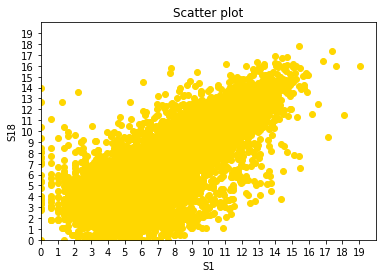

In [40]:
# Scatter plot of expression in S10 and S11
import numpy as np
import matplotlib.pyplot as plt

# We set this code to make sure the plot is under the block.
%matplotlib inline

# Set the data with log2 transformation to make it easier to plot
x = np.log2(exp3["S1"] + 1)
y = np.log2(exp3["S18"] + 1)

# Plot
fig, ax = plt.subplots()

# Add the scatter
ax.scatter(x, y, c="gold", vmin=-1) # notice the new arguments

# set aixs ticks and limits
ax.set(xlim=(0, 20), xticks=np.arange(0, 20),
       ylim=(0, 20), yticks=np.arange(0, 20))

# Add title and axis names
plt.title("Scatter plot")
plt.xlabel("S1")
plt.ylabel("S18")

# show the final plot
plt.show()

# 8

In [ ]:
# Copy any code from the shown link and create any plot.